In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [6]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser')

In [10]:
table = soup.find('table', {'class' : 'tData01 tt'})

In [48]:
# 데이터 추출
name = []
avg = []
h = []
hr = []
rbi = []

data = []

for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a'):
            data.append([td.find('a').text, tds[3].text, tds[8].text, tds[11].text, tds[13].text])
data

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [58]:
for d in data :
    print(d[1])

0.354
0.352
0.349
0.345
0.340
0.333
0.332
0.331
0.330
0.328
0.324
0.312
0.312
0.312
0.307
0.306
0.306
0.306
0.306
0.306
0.304
0.304
0.300
0.298
0.296
0.295
0.293
0.292
0.291
0.290


In [59]:
# csv 파일 저장
with open('baseball.csv', 'w', encoding='utf-8') as file:
    for d in data:
        file.write('{},{},{},{},{}\n'.format(d[0],d[1],d[2],d[3],d[4]))
print('file save done :)')

file save done :)


In [38]:
import pandas as pd
import numpy as np

In [60]:
load_data = pd.read_csv('./baseball.csv', header=None, encoding='utf-8')
load_data

,0,1,2,3,4
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [61]:
baseballDF = pd.DataFrame({
    'player' : load_data[0],
    'bat_avg': load_data[1],
    'hit'    : load_data[2],
    'homerun': load_data[3],
    'rbi'    : load_data[4],
})
baseballDF

,player,bat_avg,hit,homerun,rbi
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105
5,이정후,0.333,181,15,101
6,허경민,0.332,145,7,58
7,김현수,0.331,181,22,119
8,강백호,0.330,165,23,89
9,양의지,0.328,151,33,124


In [62]:
baseballDF.to_csv('baseballDF.csv', mode='w', encoding='utf-8')

In [63]:
# DB 입력

In [65]:
import pymongo as mongo

In [66]:
conn = mongo.MongoClient()

In [71]:
baseballDB = conn.baseballDB
baseballDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB')

In [72]:
baseballCollection = baseballDB['baseball']
baseballCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB'), 'baseball')

In [70]:
baseball_info_list = []

for idx, obj in enumerate(data):
    #print(idx, obj)
    baseball_info_list.append({
        'number' : idx,
        'player' : obj[0],
        'bat_avg': obj[1],
        'hit'    : obj[2],
        'homerun': obj[3],
        'rbi'    : obj[4]
    })

In [75]:
baseballCollection.insert_many(baseball_info_list)

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('60482c2903f297121a096883')}, 'errmsg': "E11000 duplicate key error collection: baseballDB.baseball index: _id_ dup key: { _id: ObjectId('60482c2903f297121a096883') }", 'op': {'number': 0, 'player': '최형우', 'bat_avg': '0.354', 'hit': '185', 'homerun': '28', 'rbi': '115', '_id': ObjectId('60482c2903f297121a096883')}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [76]:
cursor = baseballCollection.find()
for c in cursor:
    print(c)

{'_id': ObjectId('60482c2903f297121a096883'), 'number': 0, 'player': '최형우', 'bat_avg': '0.354', 'hit': '185', 'homerun': '28', 'rbi': '115'}
{'_id': ObjectId('60482c2903f297121a096884'), 'number': 1, 'player': '손아섭', 'bat_avg': '0.352', 'hit': '190', 'homerun': '11', 'rbi': '85'}
{'_id': ObjectId('60482c2903f297121a096885'), 'number': 2, 'player': '로하스', 'bat_avg': '0.349', 'hit': '192', 'homerun': '47', 'rbi': '135'}
{'_id': ObjectId('60482c2903f297121a096886'), 'number': 3, 'player': '박민우', 'bat_avg': '0.345', 'hit': '161', 'homerun': '8', 'rbi': '63'}
{'_id': ObjectId('60482c2903f297121a096887'), 'number': 4, 'player': '페르난데스', 'bat_avg': '0.340', 'hit': '199', 'homerun': '21', 'rbi': '105'}
{'_id': ObjectId('60482c2903f297121a096888'), 'number': 5, 'player': '이정후', 'bat_avg': '0.333', 'hit': '181', 'homerun': '15', 'rbi': '101'}
{'_id': ObjectId('60482c2903f297121a096889'), 'number': 6, 'player': '허경민', 'bat_avg': '0.332', 'hit': '145', 'homerun': '7', 'rbi': '58'}
{'_id': ObjectId

In [77]:
# 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [79]:
import warnings
warnings.filterwarnings(action='ignore')

In [84]:
baseballDF = baseballDF.set_index('player')

<Figure size 432x288 with 0 Axes>

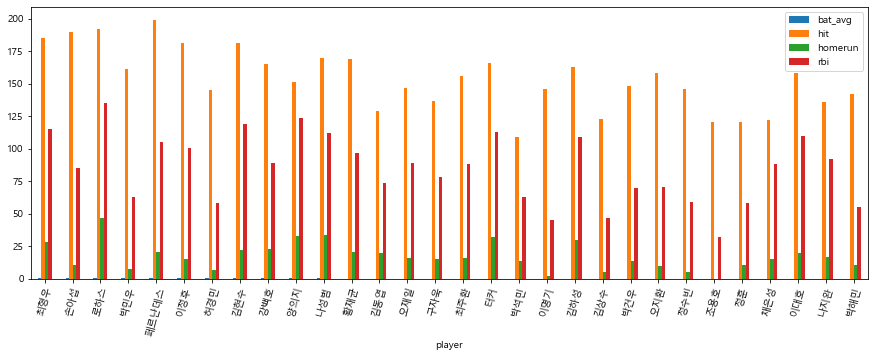

In [85]:
plt.figure()

baseballDF.plot.bar(rot=75, figsize=(15,5))

plt.show()
plt.close()

### image scraping

In [86]:
from urllib.parse import quote_plus # 자동으로 인코딩되는 것들을 디코딩시켜주기 위해

In [90]:
baseUrl       = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
searchKeyword = input('검색어 입력 : ')
maxCnt        = int(input('scraping num : '))

url = baseUrl+quote_plus(searchKeyword) # quote_plus를 이용해서 자동으로 한글 변환

try :
    html = urlopen(url)
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error') 
else:
    soup = BeautifulSoup(html.read(), 'html.parser')

soup

검색어 입력 : 강아지
scraping num : 30


<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="강아지 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'강아지'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>강아지 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210304.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

Image Crawling is done.
